1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数

In [ ]:
import pandas as pd

file_csv = pd.read_csv('data//2023_6//open_rank_20236.csv', sep = ',')
# print(file_csv)
num = file_csv.shape[0]
value = []
sum = 0
for i in range(num):
    value.append(file_csv.loc[i, 'value'])
    sum = sum + value[i]
value = sorted(value)
print(f"max:{value[num - 1]}  min:{value[0]}  ave:{sum / num}  mid:{(value[int((num - 1) / 2)] + value[int((num - 1) / 2) + 1]) / 2}")

max:1394.45  min:200.68  ave:346.9678999999999  mid:273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [9]:
import pandas as pd

file_csv = pd.read_csv('data//2022//activity_2022.csv', sep = ',')
num = file_csv.shape[0]
improve = []
for i in range(num):
    improve.append((file_csv.loc[i, '202212_value'] - file_csv.loc[i,'20221_value']) / file_csv.loc[i, '20221_value'])
    print(f'{file_csv.loc[i, 'repo']}  {improve[i]:.2%}')

MicrosoftDocs/azure-docs  -21.77%
NixOS/nixpkgs  -3.13%
dotnet/runtime  -26.05%
elastic/kibana  -13.14%
firstcontributions/first-contributions  4.49%
flutter/flutter  -17.82%
home-assistant/core  3.36%
microsoft/vscode  22.89%
pytorch/pytorch  12.83%
rust-lang/rust  -9.10%


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd

file_china_csv = pd.read_csv('data//2022//china_2022.csv', sep = ',')
file_global_csv = pd.read_csv('data//2022//global_2022.csv', sep = ',')
sum_china_issue_comment = 0
sum_global_issue_comment = 0
sum_china_value = 0
sum_global_value = 0
num = 10
for i in range(num):
    sum_china_issue_comment += file_china_csv.loc[i,'issue_comment']
    sum_global_issue_comment += file_global_csv.loc[i, 'issue_comment']

print(f"ave_issue_comment: {sum_china_issue_comment / num }  {sum_global_issue_comment / num }")

max_china_value = -1
max_global_value = -1
for i in range(num):
    sum_china_value += file_china_csv.loc[i, 'value']
    sum_global_value += file_global_csv.loc[i, 'value']
print(f'ave_value: {sum_china_value / 10} {sum_global_value / 10}')
print(f"max_value: {file_china_csv.loc[0, 'value']} {file_global_csv.loc[0, 'value']}")


ave_issue_comment: 61205.5  341409.4
ave_value: 40269.53400000001 215855.491
max_value: 103368.49 824848.67


4. 贝叶斯定理

   根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

   非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）
   
   工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）
已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

解：设事件A = 带有HTAL/Markdown标签， 事件B = 是非软件型项目，则$ P(B | A) = \frac {P(A | B)P(B)}{P(A)} = 0.85 * 0.25 / (0.85 * 0.25 + 0.1 * 0.75) = \frac{17}{23}$

解：根据贝叶斯定理，设事件A=由JavaScript编写， 事件B=是工具组件型项目，则 $P(B | A) = \frac {P(A | B)P(B)}{P(A)} = 0.35 * 0.5 / (0.35 * 0.5 + 0.1 * 0.5) = \frac{7}{9}$

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4]
    
    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

In [ ]:
import networkx as nx 
import matplotlib as plt
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
nx.draw(G)
plt.show()

7. 根据以下数据建立可视化 **有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

AttributeError: module 'matplotlib' has no attribute 'show'

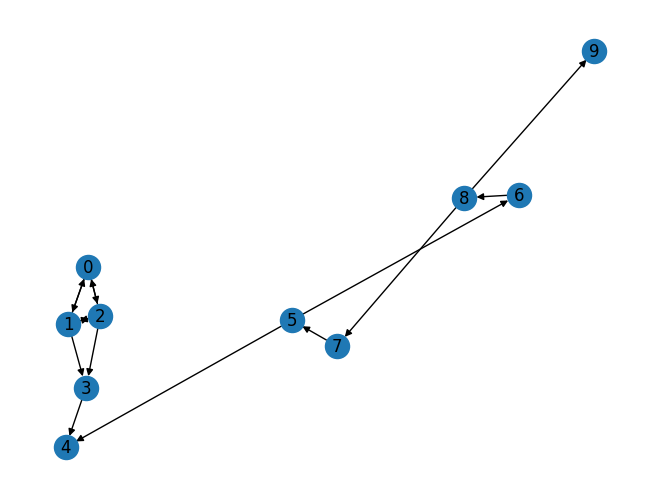

In [5]:
import networkx as nx 
import matplotlib as plt
user = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edge = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(user)
G.add_edges_from(edge)
nx.draw(G, with_labels = True)
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。

AttributeError: module 'matplotlib' has no attribute 'show'

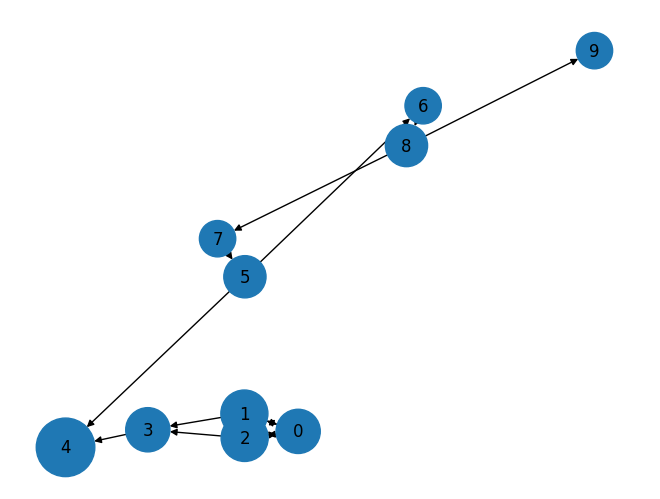

In [20]:
import networkx as nx
import matplotlib as plt
a = [[0 for __ in range(10)]for _ in range(10)]
a[1][0] = a[2][0] = 1 / 2
a[0][1] = a[2][1] = a[3][1] = 1 / 3
a[0][2] = a[1][2] = a[3][2] = 1 / 3
a[4][3] = 1
# a[4][4] = 1
a[4][5] = a[6][5] = 1 / 2
a[8][6] = 1
a[5][7] = 1
a[7][8] = a[9][8] = 1 / 2
# a[9][9] = 1
d = 0.85
for i in range(10):
    for j in range(10):
        a[i][j] = d * a[i][j] + (1 - d) * (1 / 10)
r = [0 for _ in range(10)]
r[0] = 1
flag = 1
while(flag):
    _r = [0 for _ in range(10)]
    for i in range(10):
        for j in range(10):
            _r[i] += a[i][j] * r[j]
    flag = 0
    for i in range(10):
        if(abs(r[i] - _r[i]) > 0.001):
            flag = 1
            break
    r = _r[:]
sumr = 0
for i in range(10):
    sumr += r[i]
for i in range(10):
    r[i] /= sumr
    r[i] *= 10000
user = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edge = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(user)
G.add_edges_from(edge)
nx.draw(G, node_size = r, with_labels = True)
plt.show()